In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [3]:
# Load the dataset
data = pd.read_csv("cleaned_data2.csv")

In [4]:
# Preview the data
print("Dataset preview:")
print(data.head())

Dataset preview:
   user_id        date  steps  calories_burned  distance_km  active_minutes  \
0       27  2023-05-24   1405            546.9         1.70              80   
1       64  2023-05-27    909            172.5         1.15              42   
2       32  2023-09-12   3485            327.1         1.38              37   
3       34  2023-05-13   1539            130.1         1.60              39   
4       53  2023-08-05  10980            521.4        13.01             151   

   sleep_hours  heart_rate_avg workout_type weather_conditions location  \
0          7.1              83     Swimming              Sunny     Home   
1          8.3              64         Yoga              Windy   Office   
2          8.8              70      Walking              Sunny     Park   
3          7.3              77         Yoga                Fog     Park   
4          3.1             122      Running              Windy    Other   

       mood  
0     Happy  
1   Neutral  
2     Happy  
3

In [5]:
# Check dataset information
print("\nDataset information:")
print(data.info())


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             5000 non-null   int64  
 1   date                5000 non-null   object 
 2   steps               5000 non-null   int64  
 3   calories_burned     5000 non-null   float64
 4   distance_km         5000 non-null   float64
 5   active_minutes      5000 non-null   int64  
 6   sleep_hours         5000 non-null   float64
 7   heart_rate_avg      5000 non-null   int64  
 8   workout_type        5000 non-null   object 
 9   weather_conditions  5000 non-null   object 
 10  location            5000 non-null   object 
 11  mood                5000 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 468.9+ KB
None


In [6]:
# Select relevant columns (steps and workout type)
relevant_columns = ['steps', 'workout_type', 'mood']
data = data[relevant_columns]

In [8]:
# Encode 'workout_type' and 'mood' (categorical variables)
label_encoders = {}
for col in ['workout_type', 'mood']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [9]:
# Define features and target
X = data[['steps', 'workout_type']]  # Features: steps and workout type
y = data['mood']  # Target: mood

In [10]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [12]:
# Convert target variable for deep learning model
y_train_dl = to_categorical(y_train)
y_test_dl = to_categorical(y_test)

In [13]:
# Random Forest Model
print("\nTraining Random Forest model...")
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


Training Random Forest model...


In [14]:
# Evaluate Random Forest
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.23      0.23      0.23       208
           1       0.35      0.36      0.35       352
           2       0.32      0.32      0.32       298
           3       0.19      0.18      0.18       142

    accuracy                           0.29      1000
   macro avg       0.27      0.27      0.27      1000
weighted avg       0.29      0.29      0.29      1000

Random Forest Accuracy: 0.294


In [15]:
# Feature Importance for Random Forest
feature_importances = rf.feature_importances_
print("\nRandom Forest Feature Importances:")
print(f"Steps Importance: {feature_importances[0]:.4f}")
print(f"Workout Type Importance: {feature_importances[1]:.4f}")


Random Forest Feature Importances:
Steps Importance: 0.9958
Workout Type Importance: 0.0042


In [16]:
# Deep Learning Model
print("\nTraining Deep Learning model...")
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(y_train_dl.shape[1], activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train_dl, epochs=50, batch_size=32, validation_split=0.2, verbose=1)



Training Deep Learning model...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.2977 - loss: 1.3732 - val_accuracy: 0.3512 - val_loss: 1.3368
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3698 - loss: 1.3493 - val_accuracy: 0.3512 - val_loss: 1.3379
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3263 - loss: 1.3588 - val_accuracy: 0.3512 - val_loss: 1.3396
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3534 - loss: 1.3550 - val_accuracy: 0.3512 - val_loss: 1.3383
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3505 - loss: 1.3550 - val_accuracy: 0.3512 - val_loss: 1.3371
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3677 - loss: 1.3402 - val_accuracy: 0.3512 - val_loss: 1.3378
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3635 - loss: 1.3330 - val_accuracy: 0.3512 - val_loss: 1.3389
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3641 - loss: 1.3395 - val_accuracy: 0.

In [17]:
# Evaluate Deep Learning Model
loss, accuracy = model.evaluate(X_test, y_test_dl)
print(f"\nDeep Learning Model Accuracy: {accuracy:.2f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3388 - loss: 1.3454

Deep Learning Model Accuracy: 0.35


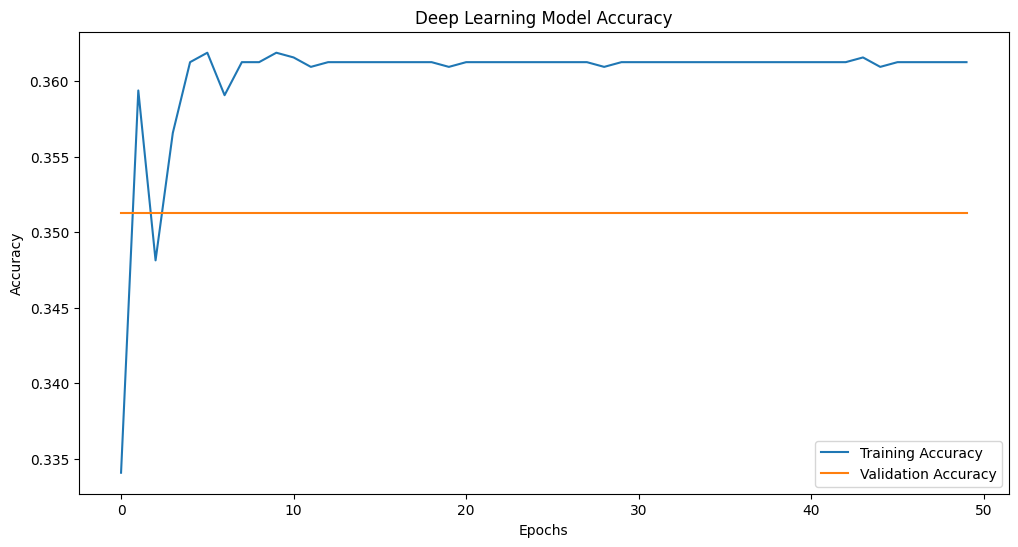

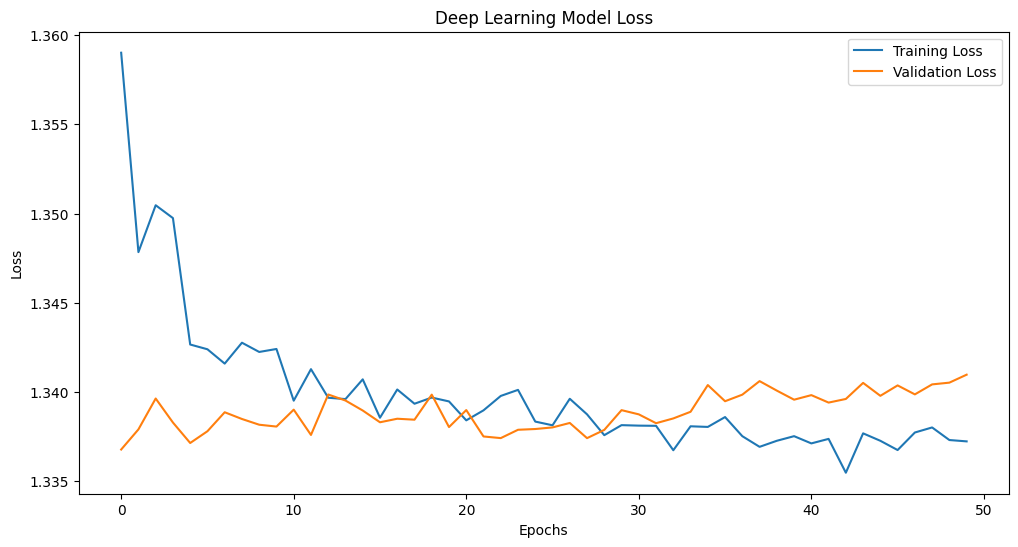

In [18]:
# Plot training history for the deep learning model
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Deep Learning Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Deep Learning Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [19]:
# Map Predictions Back to Mood Labels
print("\nMapping Predictions Back to Mood Labels...")
mood_labels = label_encoders['mood'].inverse_transform(y_pred_rf)
print("Sample Predicted Moods (Random Forest):", mood_labels[:5])


Mapping Predictions Back to Mood Labels...
Sample Predicted Moods (Random Forest): ['Happy' 'Neutral' 'Neutral' 'Happy' 'Stressed']


#Which input feature (steps or workout type) has the most impact on mood prediction

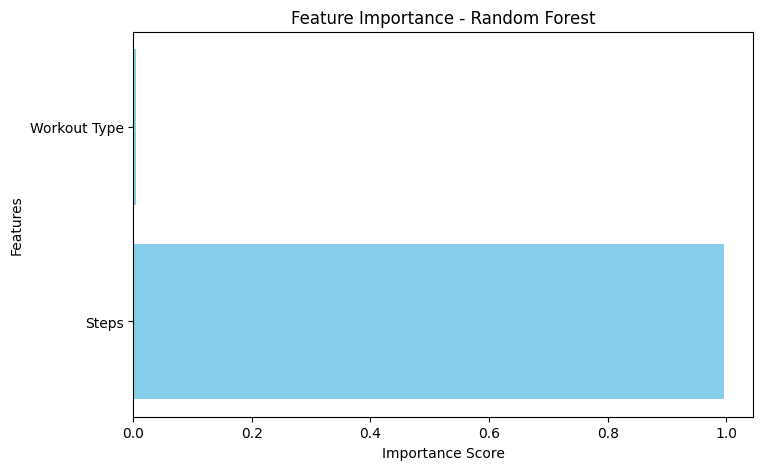

In [25]:
import matplotlib.pyplot as plt

# Feature Importance
feature_importances = rf.feature_importances_
features = ['Steps', 'Workout Type']

plt.figure(figsize=(8, 5))
plt.barh(features, feature_importances, color='skyblue')
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


#Distribution of mood predictions to understand the model's behavior.



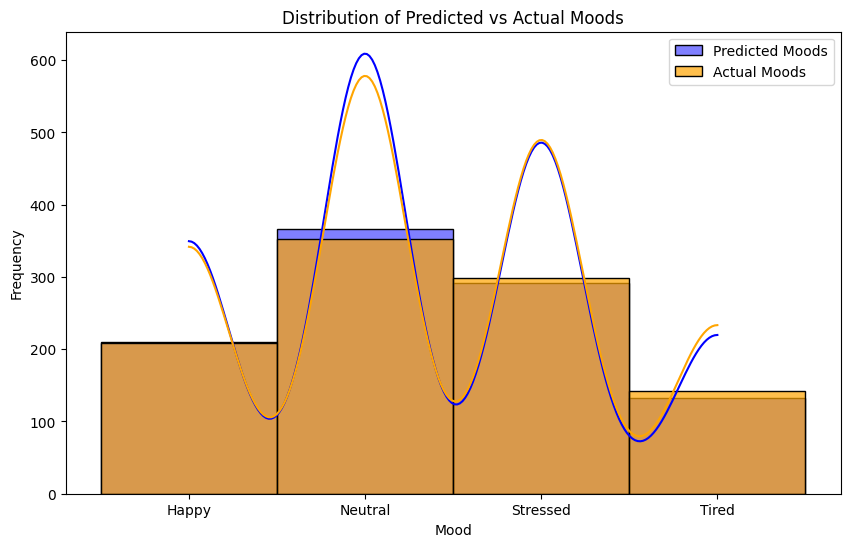

In [26]:
import seaborn as sns

# Map encoded predictions and actual values to original mood labels
predicted_moods_rf = label_encoders['mood'].inverse_transform(y_pred_rf)
actual_moods = label_encoders['mood'].inverse_transform(y_test)

# Plot distributions
plt.figure(figsize=(10, 6))
sns.histplot(predicted_moods_rf, color='blue', label='Predicted Moods', kde=True)
sns.histplot(actual_moods, color='orange', label='Actual Moods', kde=True, alpha=0.7)
plt.title('Distribution of Predicted vs Actual Moods')
plt.xlabel('Mood')
plt.ylabel('Frequency')
plt.legend()
plt.show()


#How steps correlate with mood.



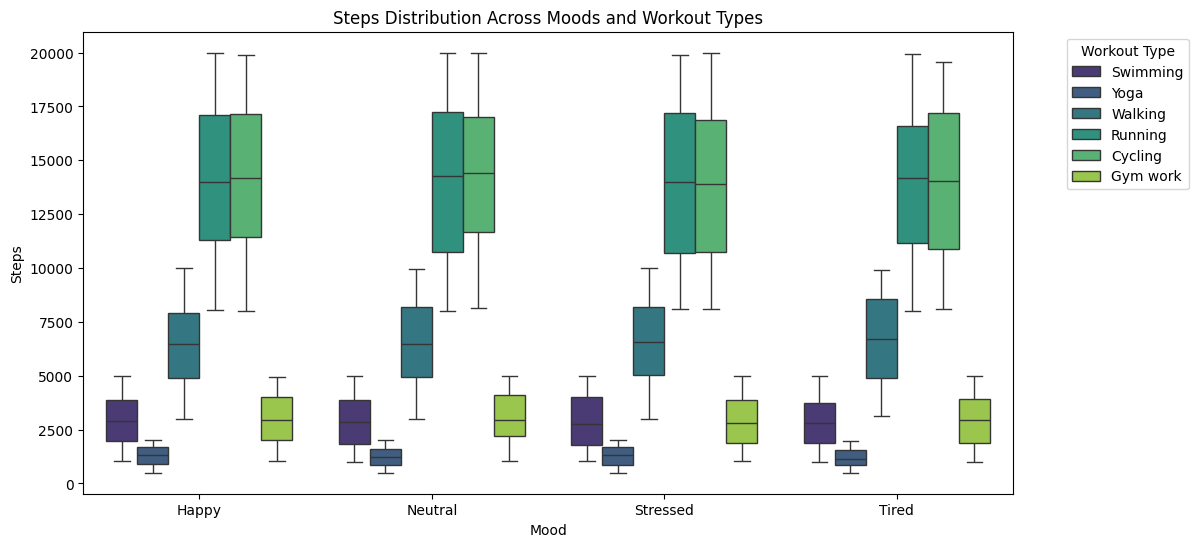

In [30]:
# Add original mood labels to the dataset for visualization
data['mood_label'] = label_encoders['mood'].inverse_transform(data['mood'])
data['workout_label'] = label_encoders['workout_type'].inverse_transform(data['workout_type'])

# Boxplot for Steps vs Mood
plt.figure(figsize=(12, 6))
sns.boxplot(x='mood_label', y='steps', hue='workout_label', data=data, palette='viridis')
plt.title('Steps Distribution Across Moods and Workout Types')
plt.xlabel('Mood')
plt.ylabel('Steps')
plt.legend(title='Workout Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
